In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from skimage.feature import local_binary_pattern

data_dir = r"D:\archive\Aerial_Landscapes" 
categories = sorted(os.listdir(data_dir))   
image_size = (128, 128)

radius = 3
n_points = 8 * radius

def extract_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, n_points + 3),
                             range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

X, y = [], []
for idx, category in enumerate(categories):
    folder = os.path.join(data_dir, category)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is None:
            continue  
        img = cv2.resize(img, image_size)
        features = extract_lbp_features(img)
        X.append(features)
        y.append(idx)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC(kernel='linear', probability=False)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))


              precision    recall  f1-score   support

 Agriculture       0.19      0.02      0.03       160
     Airport       0.23      0.30      0.26       160
       Beach       0.53      0.35      0.42       160
        City       0.14      0.38      0.21       160
      Desert       0.00      0.00      0.00       160
      Forest       0.18      0.19      0.19       160
   Grassland       0.32      0.69      0.44       160
     Highway       0.22      0.14      0.17       160
        Lake       0.51      0.16      0.25       160
    Mountain       0.17      0.17      0.17       160
     Parking       0.32      0.18      0.23       160
        Port       0.00      0.00      0.00       160
     Railway       0.13      0.56      0.21       160
 Residential       0.41      0.07      0.13       160
       River       0.15      0.02      0.03       160

    accuracy                           0.22      2400
   macro avg       0.23      0.22      0.18      2400
weighted avg       0.23   

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data_dir = r"D:\archive\Aerial_Landscapes"
categories = sorted(os.listdir(data_dir))
image_size = (256, 256)
sift = cv2.SIFT_create()

def extract_sift_features(image, max_descriptors=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    if descriptors is None:
        return np.zeros(128)
    
    descriptor = np.mean(descriptors, axis=0)
    return descriptor

X, y = [], []
for idx, category in enumerate(categories):
    folder = os.path.join(data_dir, category)
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is None:
            continue
        img = cv2.resize(img, image_size)
        features = extract_sift_features(img)
        X.append(features)
        y.append(idx)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))


              precision    recall  f1-score   support

 Agriculture       0.65      0.65      0.65       160
     Airport       0.37      0.47      0.42       160
       Beach       0.54      0.47      0.50       160
        City       0.54      0.75      0.63       160
      Desert       0.65      0.57      0.61       160
      Forest       0.80      0.86      0.83       160
   Grassland       0.68      0.44      0.54       160
     Highway       0.48      0.54      0.51       160
        Lake       0.35      0.31      0.32       160
    Mountain       0.68      0.71      0.69       160
     Parking       0.83      0.78      0.80       160
        Port       0.69      0.53      0.60       160
     Railway       0.54      0.67      0.59       160
 Residential       0.69      0.84      0.76       160
       River       0.40      0.26      0.32       160

    accuracy                           0.59      2400
   macro avg       0.59      0.59      0.58      2400
weighted avg       0.59   

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from skimage.feature import local_binary_pattern

data_dir = r"D:\archive\Aerial_Landscapes"
categories = sorted(os.listdir(data_dir))
image_size = (128, 128)

radius = 3
n_points = 8 * radius

def extract_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, n_points + 3),
                             range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

def extract_color_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins,
                        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def extract_combined_features(image):
    lbp_feat = extract_lbp_features(image)
    color_feat = extract_color_histogram(image)
    return np.concatenate((lbp_feat, color_feat))

X, y = [], []
for idx, category in enumerate(categories):
    folder = os.path.join(data_dir, category)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, image_size)
        features = extract_combined_features(img)
        X.append(features)
        y.append(idx)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))


              precision    recall  f1-score   support

 Agriculture       0.45      0.39      0.42       160
     Airport       0.41      0.47      0.44       160
       Beach       0.61      0.59      0.60       160
        City       0.57      0.72      0.64       160
      Desert       0.87      0.91      0.89       160
      Forest       0.59      0.88      0.71       160
   Grassland       0.67      0.77      0.72       160
     Highway       0.34      0.23      0.28       160
        Lake       0.56      0.33      0.41       160
    Mountain       0.42      0.37      0.39       160
     Parking       0.84      0.61      0.71       160
        Port       0.63      0.60      0.62       160
     Railway       0.46      0.55      0.50       160
 Residential       0.61      0.73      0.66       160
       River       0.34      0.29      0.31       160

    accuracy                           0.56      2400
   macro avg       0.56      0.56      0.55      2400
weighted avg       0.56   

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

def get_dataloaders(data_dir, batch_size=32):
    train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])
    test_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    train_data = datasets.ImageFolder(root=os.path.join(data_dir, 'train'), transform=train_transforms)
    test_data = datasets.ImageFolder(root=os.path.join(data_dir, 'test'), transform=test_transforms)

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size)

    return train_loader, test_loader, train_data.classes

data_dir = r"D:\archive\Aerial_Landscapes_Split"
train_loader, test_loader, class_names = get_dataloaders(data_dir, batch_size=32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
    
torch.save(model.state_dict(), "ResNet18.pth")
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=class_names, zero_division=0))


c:\Users\ztwzz\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ztwzz\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 172.1373
Epoch 2, Loss: 96.6615
Epoch 3, Loss: 81.6949
Epoch 4, Loss: 71.1009
Epoch 5, Loss: 63.6515
Epoch 6, Loss: 62.6304
Epoch 7, Loss: 53.3593
Epoch 8, Loss: 52.7626
Epoch 9, Loss: 54.0209
Epoch 10, Loss: 47.2717
              precision    recall  f1-score   support

 Agriculture       0.99      0.96      0.98       160
     Airport       0.97      0.97      0.97       160
       Beach       0.95      0.97      0.96       160
        City       0.98      0.96      0.97       160
      Desert       0.96      0.92      0.94       160
      Forest       1.00      0.95      0.97       160
   Grassland       0.98      0.98      0.98       160
     Highway       0.96      0.96      0.96       160
        Lake       0.94      0.96      0.95       160
    Mountain       0.93      0.97      0.95       160
     Parking       0.97      0.98      0.98       160
        Port       0.99      0.94      0.96       160
     Railway       0.96      0.97      0.96       160
 Residentia

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import efficientnet_b0
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

def get_dataloaders(data_dir, batch_size=32):
    train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])
    test_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    train_data = datasets.ImageFolder(root=os.path.join(data_dir, 'train'), transform=train_transforms)
    test_data = datasets.ImageFolder(root=os.path.join(data_dir, 'test'), transform=test_transforms)

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size)

    return train_loader, test_loader, train_data.classes

data_dir = r"D:\\archive\\Aerial_Landscapes_Split"
train_loader, test_loader, class_names = get_dataloaders(data_dir, batch_size=32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

torch.save(model.state_dict(), "efficientnet.pth")

model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=class_names, zero_division=0))


Epoch 1, Loss: 317.4750
Epoch 2, Loss: 104.6475
Epoch 3, Loss: 80.6666
Epoch 4, Loss: 69.4249
Epoch 5, Loss: 62.0424
Epoch 6, Loss: 54.0020
Epoch 7, Loss: 50.0887
Epoch 8, Loss: 46.9418
Epoch 9, Loss: 43.3829
Epoch 10, Loss: 43.6203
              precision    recall  f1-score   support

 Agriculture       0.98      0.98      0.98       160
     Airport       1.00      0.99      1.00       160
       Beach       0.99      0.97      0.98       160
        City       0.99      0.97      0.98       160
      Desert       0.98      0.98      0.98       160
      Forest       0.99      0.99      0.99       160
   Grassland       0.98      0.98      0.98       160
     Highway       0.98      0.98      0.98       160
        Lake       0.98      0.97      0.98       160
    Mountain       0.98      0.97      0.97       160
     Parking       0.99      1.00      1.00       160
        Port       0.96      0.98      0.97       160
     Railway       0.98      0.98      0.98       160
 Residenti

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import pretrainedmodels

def get_dataloaders(data_dir, batch_size=32):
    train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])
    test_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    train_data = datasets.ImageFolder(root=os.path.join(data_dir, 'train'), transform=train_transforms)
    test_data = datasets.ImageFolder(root=os.path.join(data_dir, 'test'), transform=test_transforms)

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size)

    return train_loader, test_loader, train_data.classes

data_dir = r"D:\archive\Aerial_Landscapes_Split"
train_loader, test_loader, class_names = get_dataloaders(data_dir, batch_size=32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = pretrainedmodels.__dict__['se_resnet50'](pretrained='imagenet')

model.last_linear = nn.Linear(model.last_linear.in_features, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
torch.save(model.state_dict(), "SENet.pth")

model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=class_names, zero_division=0))


Epoch 1, Loss: 165.8857
Epoch 2, Loss: 77.0654
Epoch 3, Loss: 61.6643
Epoch 4, Loss: 57.3939
Epoch 5, Loss: 53.1271
Epoch 6, Loss: 50.3714
Epoch 7, Loss: 41.5524
Epoch 8, Loss: 42.3301
Epoch 9, Loss: 42.1637
Epoch 10, Loss: 41.8219
              precision    recall  f1-score   support

 Agriculture       0.97      0.99      0.98       160
     Airport       0.98      0.99      0.98       160
       Beach       1.00      0.93      0.96       160
        City       1.00      0.97      0.98       160
      Desert       0.99      0.95      0.97       160
      Forest       0.96      0.97      0.97       160
   Grassland       0.97      0.99      0.98       160
     Highway       0.97      0.96      0.97       160
        Lake       0.95      0.98      0.97       160
    Mountain       0.96      0.98      0.97       160
     Parking       0.99      0.99      0.99       160
        Port       0.93      0.99      0.96       160
     Railway       0.97      0.94      0.96       160
 Residentia

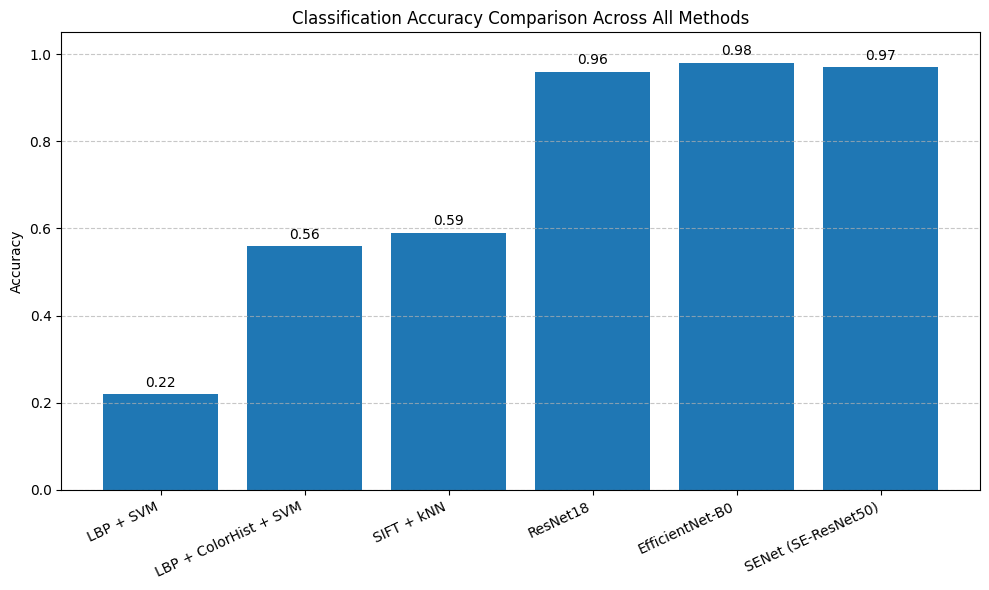

In [ ]:
import matplotlib.pyplot as plt

models = [
    "LBP + SVM",
    "LBP + ColorHist + SVM",
    "SIFT + kNN",
    "ResNet18",
    "EfficientNet-B0",
    "SENet (SE-ResNet50)"
]

accuracies = [0.22, 0.56, 0.59, 0.96, 0.98, 0.97]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title("Classification Accuracy Comparison Across All Methods")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# train_efficientnet_imbalanced.py
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b0
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

from imbalanced_dataset_tools import (
    ImbalancedImageFolder, get_weighted_sampler,
    get_class_weights, get_class_distribution, get_minority_classes
)

data_dir = r"D:\\archive\\Aerial_Landscapes_Split"
train_root = os.path.join(data_dir, 'train')
test_root = os.path.join(data_dir, 'test')
batch_size = 32
num_epochs = 10

class_counts = get_class_distribution(train_root)
minority_classes = get_minority_classes(class_counts, threshold=300)

train_data = ImbalancedImageFolder(root=train_root, minority_classes=minority_classes)
sampler = get_weighted_sampler(train_data)
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=sampler)

from torchvision import transforms, datasets

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

test_data = datasets.ImageFolder(root=test_root, transform=test_transforms)
test_loader = DataLoader(test_data, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(train_data.classes))
model = model.to(device)

class_weights = get_class_weights(train_data).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=test_data.classes, zero_division=0))


c:\Users\ztwzz\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ztwzz\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 319.9843
Epoch 2, Loss: 103.5591
Epoch 3, Loss: 79.7151
Epoch 4, Loss: 71.2487
Epoch 5, Loss: 58.4632
Epoch 6, Loss: 54.9408
Epoch 7, Loss: 49.3530
Epoch 8, Loss: 47.7637
Epoch 9, Loss: 44.0647
Epoch 10, Loss: 38.1597
              precision    recall  f1-score   support

 Agriculture       0.97      0.97      0.97       160
     Airport       0.99      0.99      0.99       160
       Beach       0.97      0.96      0.97       160
        City       0.98      0.99      0.98       160
      Desert       0.97      0.96      0.97       160
      Forest       0.97      1.00      0.98       160
   Grassland       0.97      0.98      0.98       160
     Highway       0.99      0.95      0.97       160
        Lake       0.93      0.97      0.95       160
    Mountain       0.96      0.96      0.96       160
     Parking       1.00      0.99      0.99       160
        Port       0.98      0.97      0.97       160
     Railway       0.96      0.99      0.97       160
 Residenti

In [ ]:
import os
import gc
import torch
import numpy as np
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
from torchvision import transforms, datasets
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

test_dir = r"D:\\archive\\Aerial_Landscapes_Split\\test"
model_path = "efficientnet.pth"
MAX_IMAGES = None  

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
pil_transform = transforms.Compose([transforms.Resize((224, 224))])

raw_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
pil_dataset = datasets.ImageFolder(root=test_dir, transform=pil_transform)
class_names = raw_dataset.classes

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, len(class_names))
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

def apply_perturbations(img, mode):
    img = img.copy()
    if mode == 'blur':
        img = img.filter(ImageFilter.GaussianBlur(radius=5))
    elif mode == 'occlude':
        draw = ImageDraw.Draw(img)
        draw.rectangle([70, 70, 120, 120], fill=(0, 0, 0))
    elif mode == 'noise':
        np_img = np.array(img).astype(np.uint8)
        noise = np.random.randint(0, 50, np_img.shape, dtype='uint8')
        img = Image.fromarray(np.clip(np_img + noise, 0, 255).astype('uint8'))
    elif mode == 'darken':
        img = ImageEnhance.Brightness(img).enhance(0.4)
    elif mode == 'contrast':
        img = ImageEnhance.Contrast(img).enhance(2.0)
    return img

perturb_types = ['blur', 'occlude', 'noise', 'darken', 'contrast']
perturb_stats = {p: {'correct': 0, 'total': 0} for p in perturb_types}

def process_image(index):
    raw_tensor, label = raw_dataset[index]
    pil_img, _ = pil_dataset[index]

    input_tensor = raw_tensor.unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(input_tensor)
        pred_class = output.argmax().item()

        for mode in perturb_types:
            pert_pil = apply_perturbations(pil_img, mode)
            pert_tensor = transform(pert_pil).unsqueeze(0).to(device)
            output_pert = model(pert_tensor)
            pred_pert_class = output_pert.argmax().item()

            if pred_pert_class == label:
                perturb_stats[mode]['correct'] += 1
            perturb_stats[mode]['total'] += 1

    gc.collect()
    torch.cuda.empty_cache()

total_images = len(raw_dataset)
if MAX_IMAGES:
    total_images = min(total_images, MAX_IMAGES)

for idx in range(total_images):
    print(f"Processing {idx + 1}/{total_images}...", end='\r')
    process_image(idx)

print("\n--- Perturbation Accuracy Summary ---")
for p_type, stats in perturb_stats.items():
    correct = stats['correct']
    total = stats['total']
    acc = correct / total if total > 0 else 0
    print(f"{p_type.title():<10}: {correct}/{total} → Accuracy: {acc:.2%}")


C:\Users\ztwzz\AppData\Local\Temp\ipykernel_14608\4117229550.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d

Processing 2400/2400...
--- Perturbation Accuracy Summary ---
Blur      : 836/2400 → Accuracy: 34.83%
Occlude   : 2233/2400 → Accuracy: 93.04%
Noise     : 247/2400 → Accuracy: 10.29%
Darken    : 2286/2400 → Accuracy: 95.25%
Contrast  : 2307/2400 → Accuracy: 96.12%
